# Assignment 1 — Histogram Processing
This assignment has **three parts**:

- **Part A:** Histogram Stretching + Histogram Clipping (with outliers)
- **Part B:** Histogram Equalization vs CLAHE
- **Part C:** Histogram Matching (source → reference)

### Dataset images (place in the same folder as this notebook)
- `peppers_sipi_4.2.07.png`
- `mandrill_sipi_4.2.03.png`

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def _hist(img, bins=256):
    return cv2.calcHist([img],[0],None,[bins],[0,256]).ravel()

def show_img(img, title="", cmap="gray"):
    plt.figure(figsize=(5,4))
    plt.imshow(img, cmap=cmap, vmin=0, vmax=255)
    plt.title(title)
    plt.axis("off")
    plt.show()

def show_hist(img, title="Histogram"):
    h = _hist(img)
    plt.figure(figsize=(6,3))
    plt.plot(h)
    plt.xlim(0,255)
    plt.title(title)
    plt.show()
    return h

def show_img_hist(img, title_img="", title_hist="Histogram"):
    h = _hist(img)
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    ax[0].imshow(img, cmap="gray", vmin=0, vmax=255)
    ax[0].set_title(title_img)
    ax[0].axis("off")
    ax[1].plot(h)
    ax[1].set_xlim(0,255)
    ax[1].set_title(title_hist)
    plt.tight_layout()
    plt.show()
    return h

def show_grid(images, titles, ncols=4, figsize=(16,8)):
    n = len(images)
    nrows = int(np.ceil(n / ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize=figsize)
    ax = np.array(ax).reshape(nrows, ncols)

    for i in range(nrows*ncols):
        r, c = divmod(i, ncols)
        ax[r,c].axis("off")
        if i < n:
            ax[r,c].imshow(images[i], cmap="gray", vmin=0, vmax=255)
            ax[r,c].set_title(titles[i])
    plt.tight_layout()
    plt.show()


## Load images

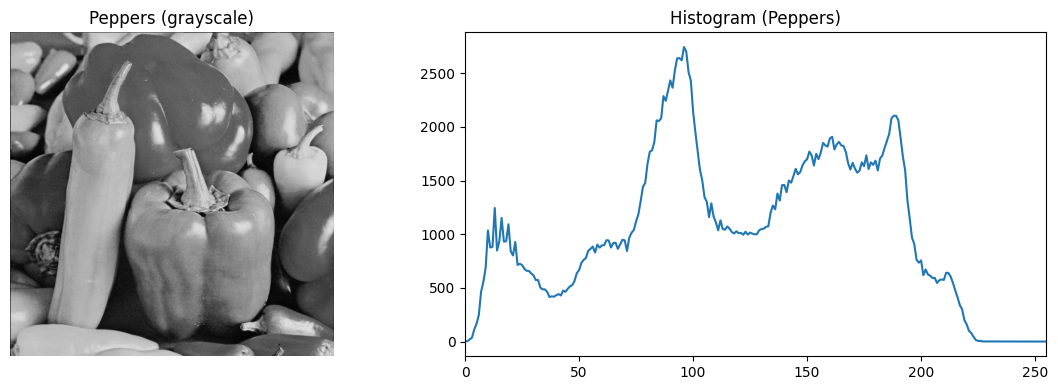

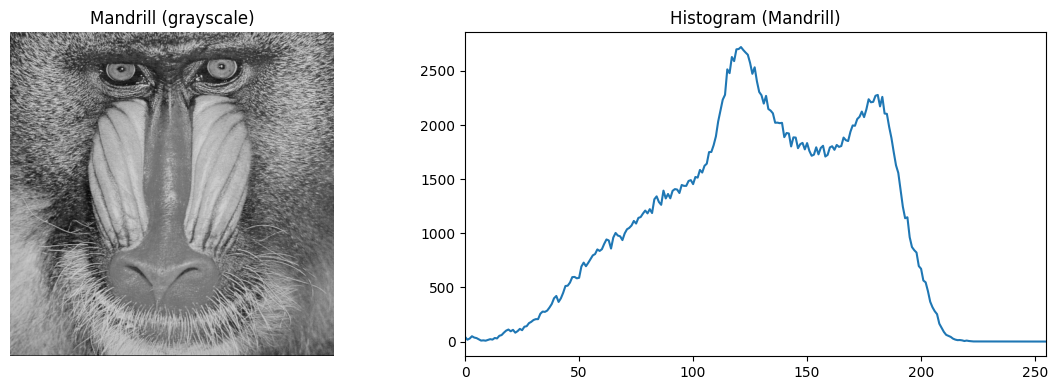

array([4.200e+01, 1.700e+01, 2.800e+01, 4.900e+01, 3.700e+01, 3.200e+01,
       2.000e+01, 9.000e+00, 1.100e+01, 8.000e+00, 1.500e+01, 2.200e+01,
       1.800e+01, 3.300e+01, 2.900e+01, 5.300e+01, 6.000e+01, 8.200e+01,
       1.010e+02, 1.110e+02, 9.500e+01, 1.080e+02, 8.200e+01, 9.600e+01,
       1.170e+02, 1.050e+02, 1.370e+02, 1.420e+02, 1.700e+02, 1.820e+02,
       1.990e+02, 2.070e+02, 2.070e+02, 2.570e+02, 2.770e+02, 2.740e+02,
       2.860e+02, 3.140e+02, 3.470e+02, 4.000e+02, 4.210e+02, 3.660e+02,
       3.990e+02, 4.500e+02, 5.130e+02, 5.160e+02, 5.450e+02, 5.950e+02,
       5.970e+02, 5.840e+02, 5.890e+02, 6.930e+02, 7.290e+02, 6.960e+02,
       7.270e+02, 7.610e+02, 7.960e+02, 8.080e+02, 8.510e+02, 8.370e+02,
       8.530e+02, 9.020e+02, 9.430e+02, 9.340e+02, 8.590e+02, 9.610e+02,
       1.003e+03, 9.790e+02, 9.720e+02, 9.370e+02, 9.990e+02, 1.037e+03,
       1.050e+03, 1.072e+03, 1.114e+03, 1.090e+03, 1.142e+03, 1.150e+03,
       1.182e+03, 1.210e+03, 1.184e+03, 1.223e+03, 

In [5]:
peppers = cv2.imread("images/peppers_sipi_4.2.07.png")
if peppers is None:
    raise FileNotFoundError("Missing peppers_sipi_4.2.07.png (place it next to the notebook).")
gray = cv2.cvtColor(peppers, cv2.COLOR_BGR2GRAY)

ref = cv2.imread("images/mandrill_sipi_4.2.03.png", cv2.IMREAD_GRAYSCALE)
if ref is None:
    raise FileNotFoundError("Missing mandrill_sipi_4.2.03.png (place it next to the notebook).")

show_img_hist(gray, "Peppers (grayscale)", "Histogram (Peppers)")
show_img_hist(ref, "Mandrill (grayscale)", "Histogram (Mandrill)")

## Part A — Create low-contrast + inject outliers (20 zeros + 20 255)

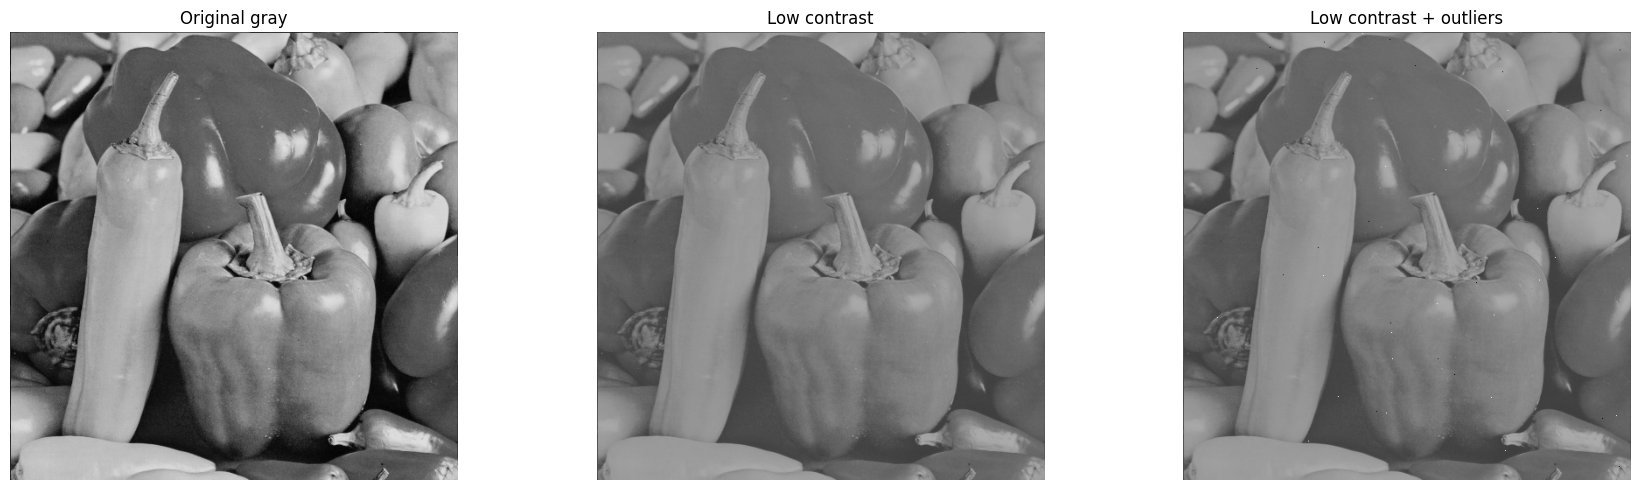

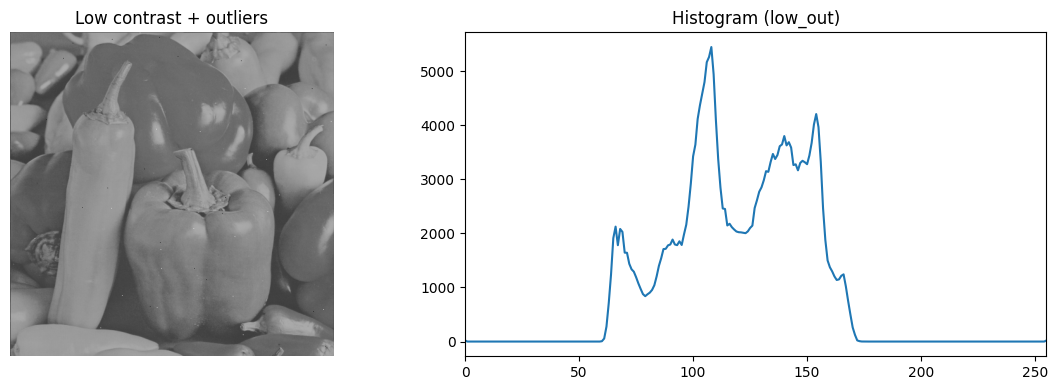

min/max: 0 255


In [6]:
low = np.clip(gray.astype(np.float32) * 0.5 + 60, 0, 255).astype(np.uint8)

rng = np.random.default_rng(0)
flat = low.ravel().copy()
idx = rng.choice(flat.size, size=40, replace=False)
flat[idx[:20]] = 0
flat[idx[20:]] = 255
low_out = flat.reshape(low.shape)

show_grid([gray, low, low_out],
          ["Original gray", "Low contrast", "Low contrast + outliers"],
          ncols=3, figsize=(18,5))
show_img_hist(low_out, "Low contrast + outliers", "Histogram (low_out)")
print("min/max:", int(low_out.min()), int(low_out.max()))

### Part A — Min-Max Stretching

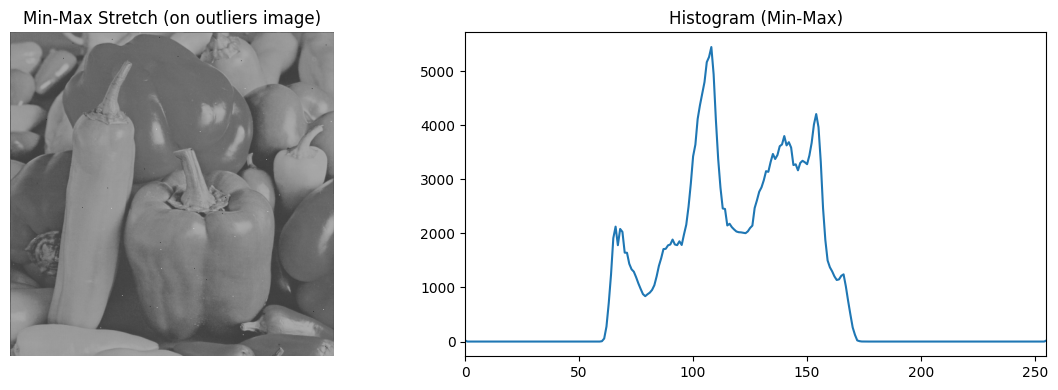

array([2.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       6.000e+00, 5.600e+01, 2.770e+02, 7.110e+02, 1.240e+03, 1.911e+03,
       2.124e+03, 1.781e+03, 2.081e+03, 2.027e+03, 1.643e+03, 1.641e+03,
       1.437e+03, 1.336e+03, 1.291e+03, 1.189e+03, 1.074e+03, 9.720e+02,
       8.770e+02, 8.390e+02, 8.740e+02, 9.040e+02, 

In [ ]:
def stretch_minmax(img):
    # TODO
    pass

# TODO:
# out_mm = stretch_minmax(low_out)
# show_img_hist(out_mm, "Min-Max Stretch", "Histogram")

### Part A — Percentile Stretching

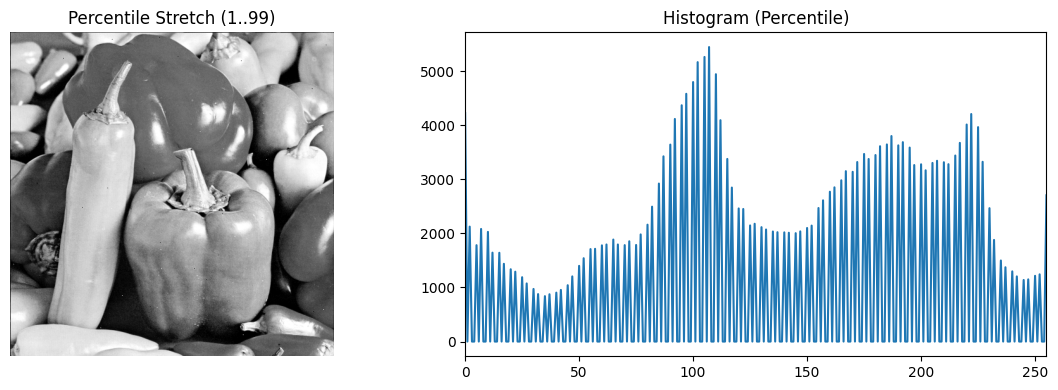

array([4221.,    0., 2124.,    0.,    0., 1781.,    0., 2081.,    0.,
          0., 2027.,    0., 1643.,    0.,    0., 1641.,    0., 1437.,
          0.,    0., 1336.,    0., 1291.,    0.,    0., 1189.,    0.,
       1074.,    0.,    0.,  972.,    0.,  877.,    0.,    0.,  839.,
          0.,  874.,    0.,    0.,  904.,    0.,  954.,    0.,    0.,
       1041.,    0., 1204.,    0.,    0., 1399.,    0., 1540.,    0.,
          0., 1709.,    0., 1714.,    0.,    0., 1778.,    0., 1794.,
          0.,    0., 1885.,    0., 1794.,    0.,    0., 1782.,    0.,
       1853.,    0.,    0., 1785.,    0., 1980.,    0.,    0., 2160.,
          0., 2493.,    0.,    0., 2920.,    0., 3423.,    0.,    0.,
       3640.,    0., 4114.,    0.,    0., 4367.,    0., 4579.,    0.,
          0., 4796.,    0., 5164.,    0.,    0., 5260.,    0., 5443.,
          0.,    0., 4941.,    0., 4091.,    0.,    0., 3375.,    0.,
       2846.,    0.,    0., 2460.,    0., 2450.,    0.,    0., 2146.,
          0., 2177.,

In [ ]:
def stretch_percentile(img, p_low=1, p_high=99):
    # TODO
    pass

# TODO:
# out_p = stretch_percentile(low_out, 1, 99)
# show_img_hist(out_p, "Percentile Stretch (1..99)", "Histogram")

### Part A — Histogram Clipping + Redistribution + CDF Mapping

clip_limits: [256, 512, 1024, 2048, 4096]


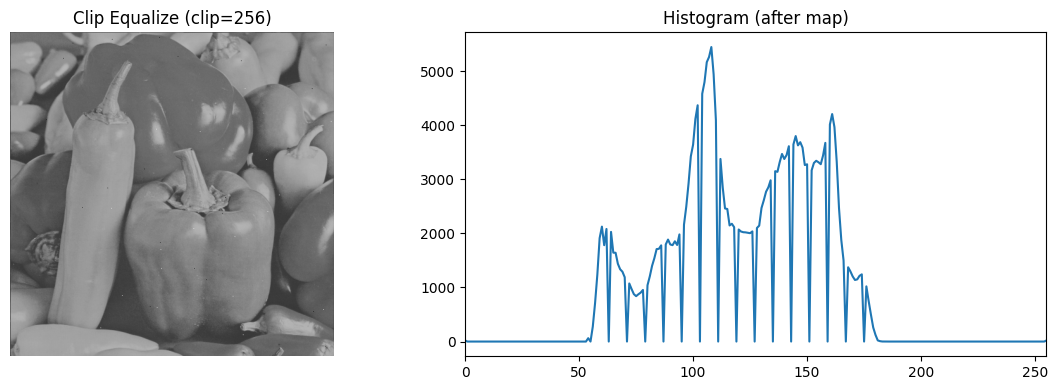

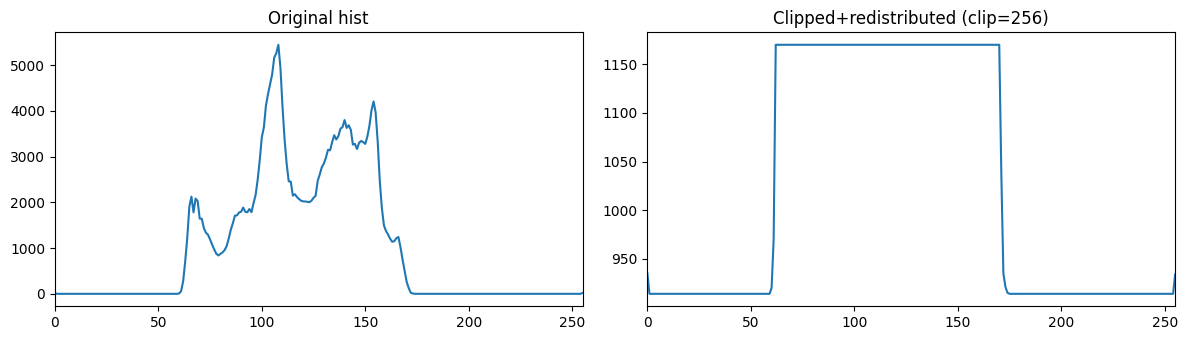

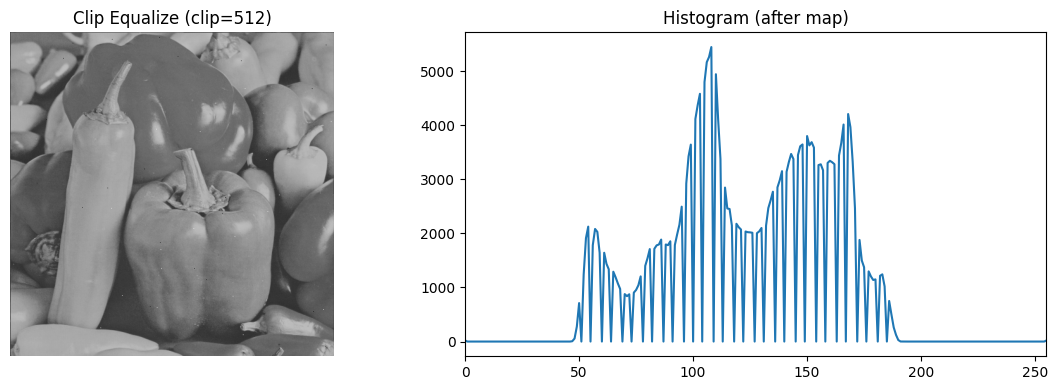

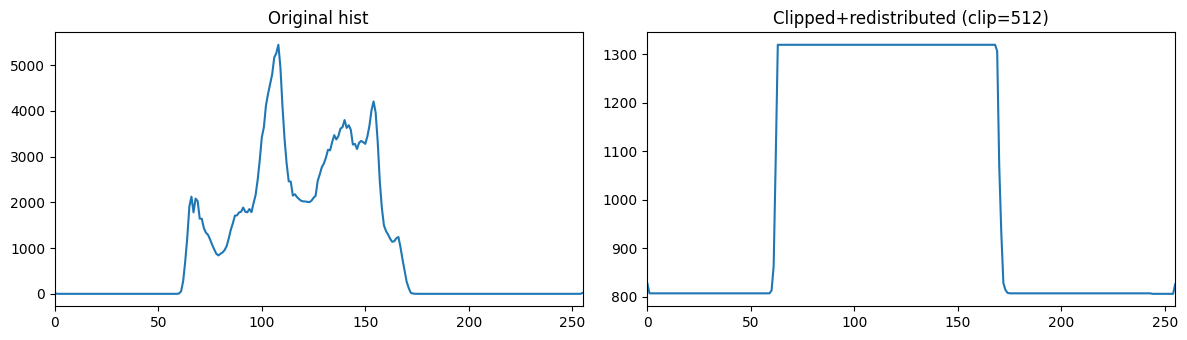

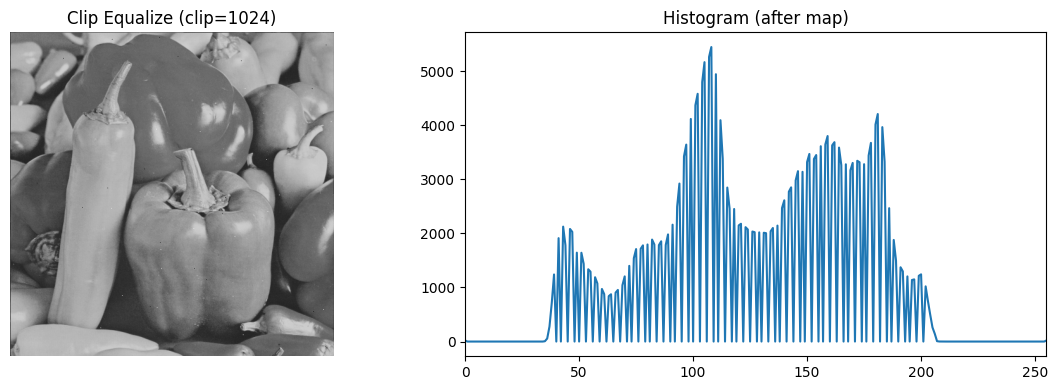

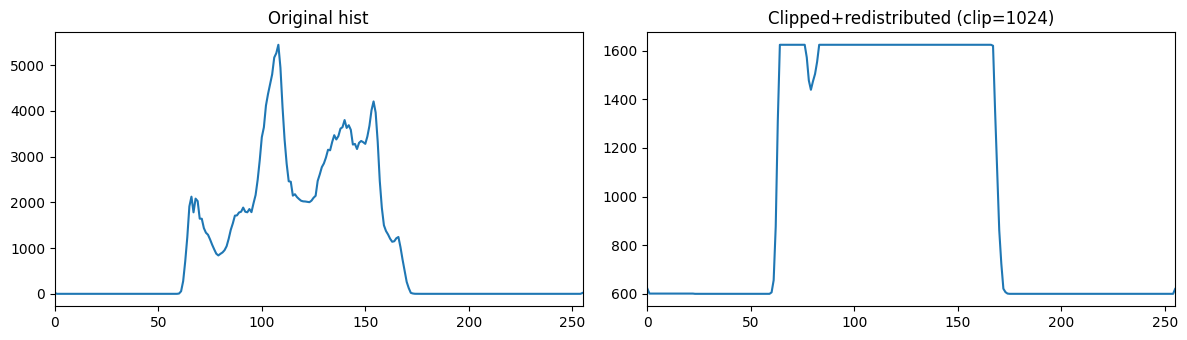

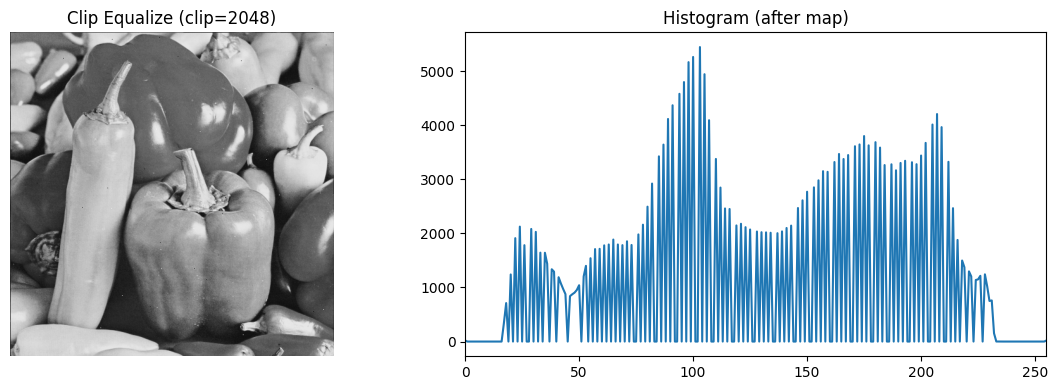

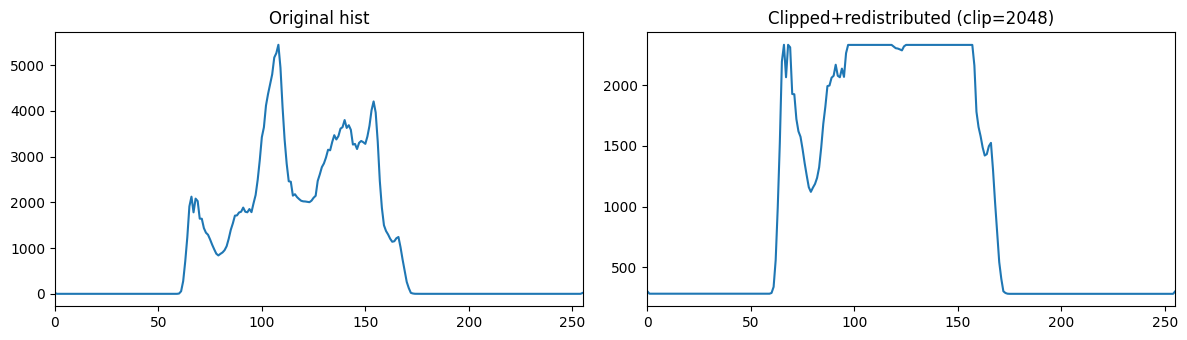

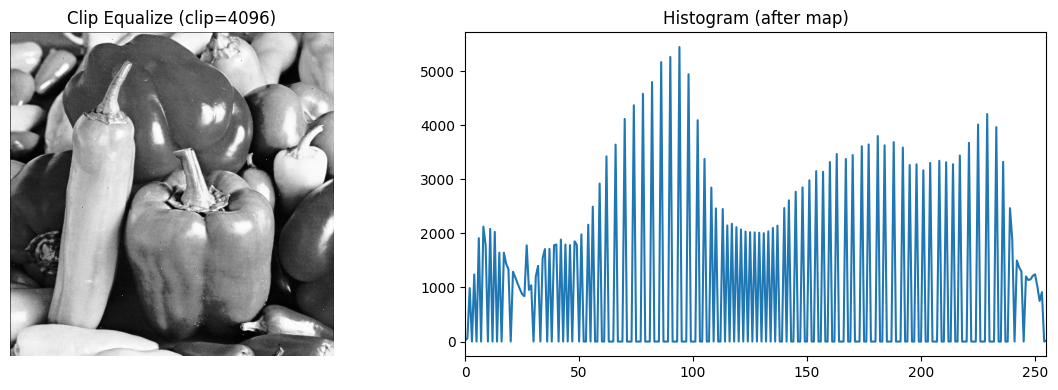

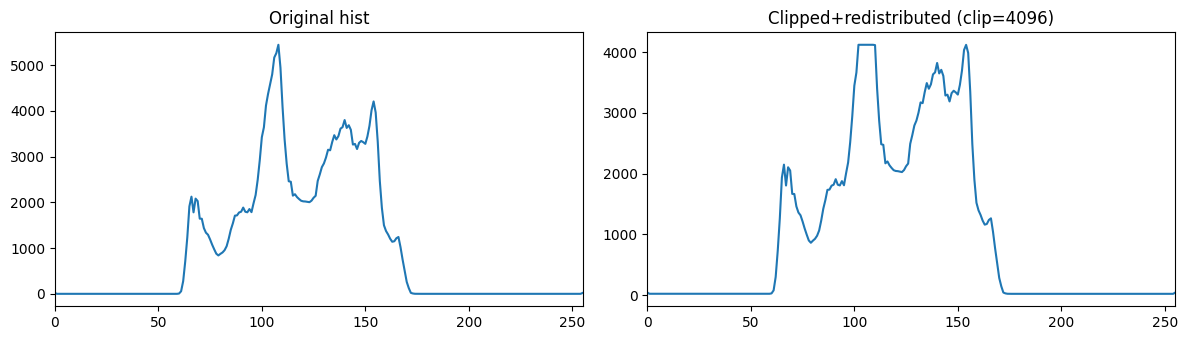

In [ ]:
def clip_equalize(img, clip_limit, bins=256):
    # TODO
    pass

def suggest_clip_limits(img, factors=(0.25, 0.5, 1, 2, 4), bins=256):
    mean = img.size / bins
    return [max(1, int(mean*f)) for f in factors]

cls = suggest_clip_limits(low_out, factors=(0.25,0.5,1,2,4))
print("clip_limits:", cls)

for cl in cls:
    out, h0, hc = clip_equalize(low_out, cl)
    show_img_hist(out, f"Clip Equalize (clip={cl})", "Histogram (after map)")

    fig, ax = plt.subplots(1,2, figsize=(12,3.5))
    ax[0].plot(h0); ax[0].set_xlim(0,255); ax[0].set_title("Original hist")
    ax[1].plot(hc); ax[1].set_xlim(0,255); ax[1].set_title(f"Clipped+redistributed (clip={cl})")
    plt.tight_layout(); plt.show()

## Part B — Histogram Equalization vs CLAHE

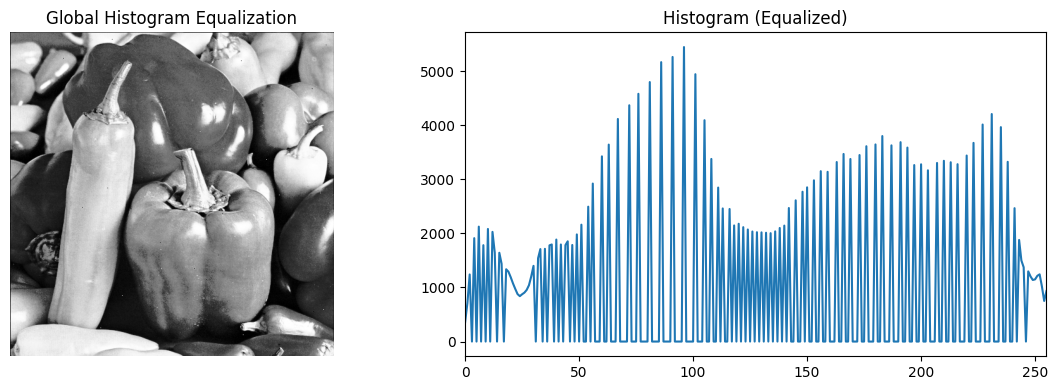

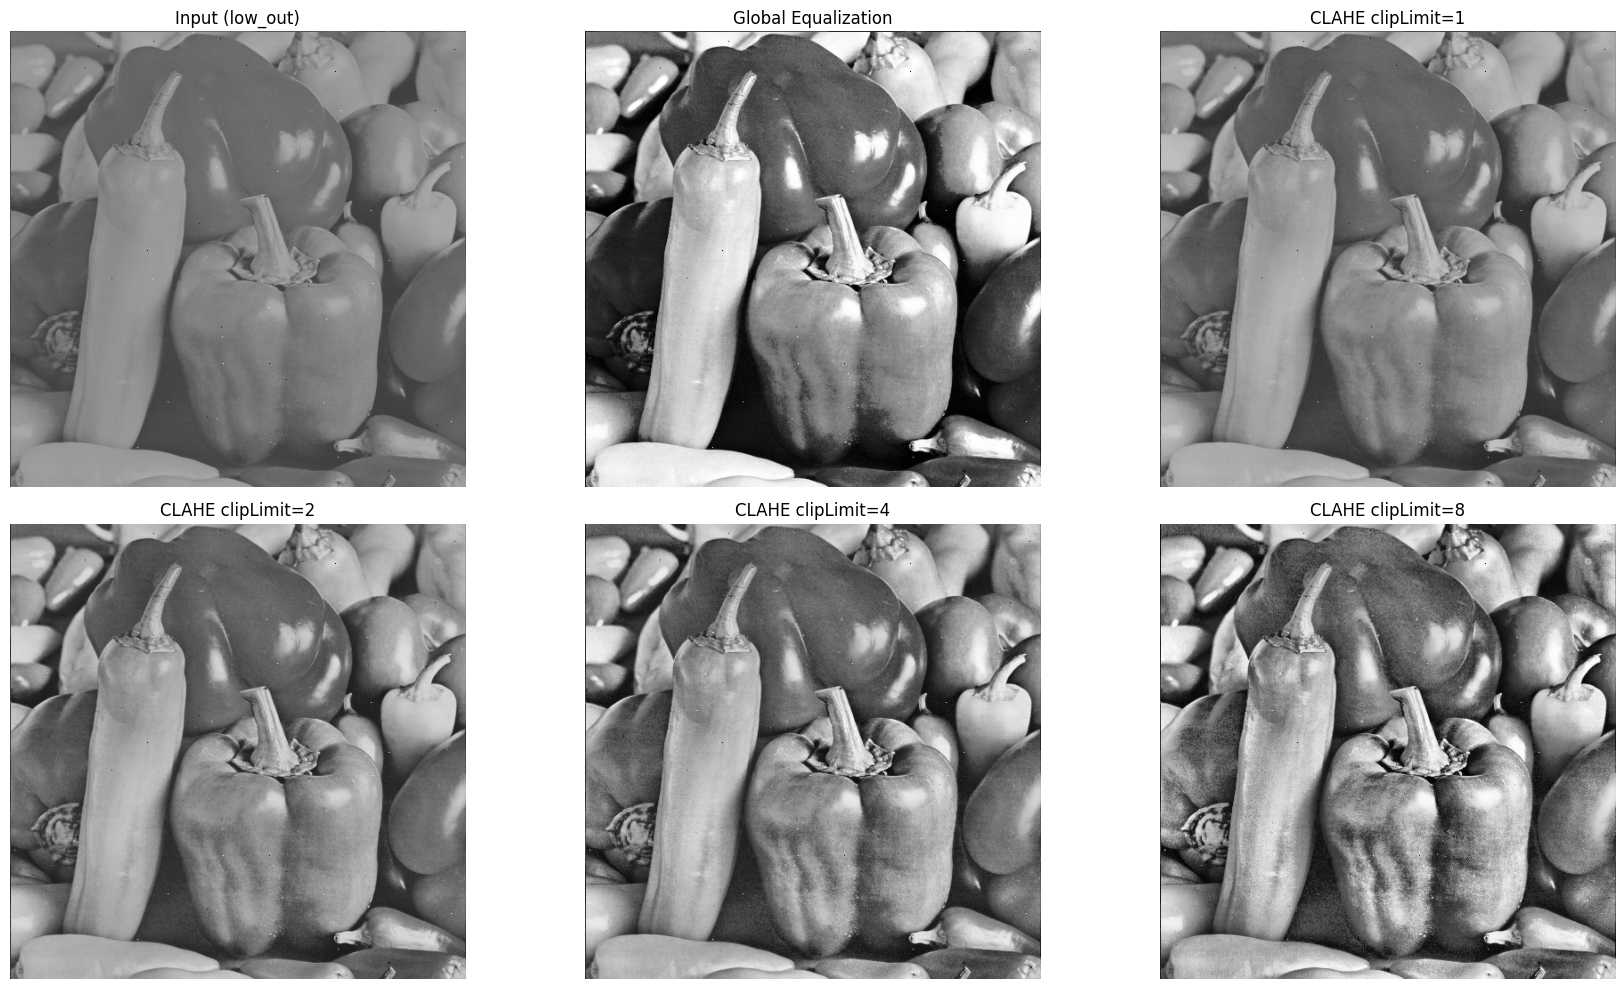

In [ ]:
# TODO:
# 1) eq = cv2.equalizeHist(...)
# 2) for clipLimit in [1,2,4,8]: apply CLAHE
# 3) plot results with show_grid / show_img_hist

## Part C — Histogram Matching (source → reference)

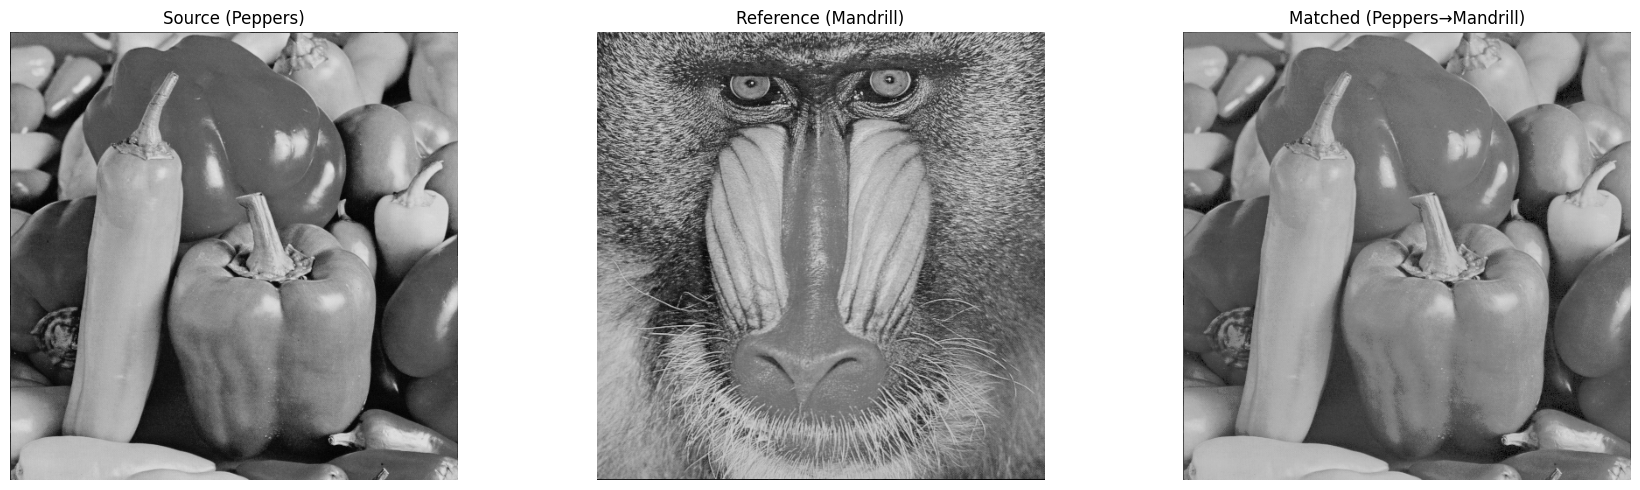

array([2.600e+01, 3.600e+01, 0.000e+00, 0.000e+00, 1.130e+02, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.650e+02, 0.000e+00, 0.000e+00, 0.000e+00, 2.470e+02,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.640e+02, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 5.540e+02, 0.000e+00, 0.000e+00,
       6.860e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.035e+03,
       0.000e+00, 8.760e+02, 0.000e+00, 0.000e+00, 8.820e+02, 0.000e+00,
       0.000e+00, 1.244e+03, 8.480e+02, 0.000e+00, 9.340e+02, 0.000e+00,
       1.151e+03, 0.000e+00, 9.310e+02, 9.350e+02, 0.000e+00, 1.092e+03,
       8.410e+02, 8.020e+02, 9.270e+02, 7.140e+02, 7.240e+02, 1.390e+03,
       6.590e+02, 6.570e+02, 1.250e+03, 5.730e+02, 1.075e+03, 9.720e+02,
       1.298e+03, 8.500e+02, 8.710e+02, 9.380e+02, 1.006e+03, 1.092e+03,
       1.304e+03, 7.330e+02, 7.610e+02, 1.625e+03, 8.630e+02, 8.850e+02,
       1.732e+03, 8.750e+02, 1.794e+03, 9.440e+02, 

In [ ]:
def hist_match(source, reference):
    # TODO
    pass

# TODO:
# matched = hist_match(gray, ref)
# show_grid([gray, ref, matched], [...], ncols=3)
# show_hist(matched, "Histogram (Matched)")

## Analytical questions (short answers)
**Part A**
1. Why does Min-Max stretching become ineffective when a few outliers exist at 0 and 255?
2. Why does percentile stretching fix that issue?
3. How does clip_limit change the behavior (low vs high clip_limit)?

**Part B**<br>
4. When does global histogram equalization cause over-enhancement?<br>
5. What does CLAHE clipLimit control? What happens when it is too small or too large?

**Part C**<br>
6. Does histogram matching guarantee perceptual similarity? Why or why not?
